In [1]:
# Code from last time
# Code to draw colored Julia set 

import numpy

def draw_julia_color(c, max_iter, xmin, xmax, ymin, ymax):
    """Draws colored Julia set for z^2+c. 
    Color is hotter for points that take longer to escape.
    Should only use with |c|<2. 
    max_iter is max number of iterations
    xmin, xmax smallest, largest x-coordinates to check."""

    height = 600  # height in pixels of image
    width = 600
 
    max_abs=2 # if |z|>2 then the iterates f(z),f(f(z)),... escape to infinity

    xinc=(xmax-xmin)/width   # width of each pixel
    yinc=(ymax-ymin)/height

    julia = numpy.zeros((height,width)) # initialize a numpy array of all zeros

    for x in range(width):
        for y in range(height):
            z = complex((xmin + xinc*x),(ymin + yinc*y))
            iters = 0 # count of number of iterations
            while iters<max_iter and abs(z)<max_abs:
                z = z*z + c 
                iters += 1
            # if don't escape, iters = max_iter
            # if it does escape, iters is lower the faster it escapes
            julia[y,x] = iters/max_iter
    return matrix_plot(julia, cmap='hot', origin="lower")  #'hot' is a particular color profile
    

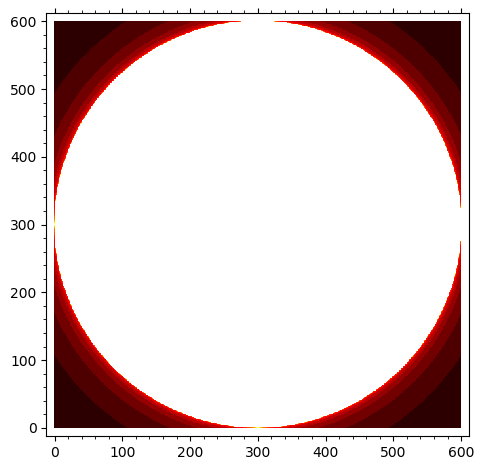

In [2]:
# f_0 (z) = z^2 + 0
draw_julia_color(0, 20, -1, 1, -1, 1)
# Julia set is the boundary of the white region, the unit circle

<h3> Definition of Mandlebrot set </h3>

Let $f_c(z) = z^2 + c$ (these give the "quadratic family").
The Mandlebrot set is defined as 
$$M = \left\{c : \lim_{n\to\infty} f_c^{\circ n}(0) \ne \infty \right\},$$
i.e. those $c$ for which the orbit of $0$ under iteration of $f_c$ does not escape.

In [3]:
# Code to draw the Mandlebrot set 

def mandlebrot(max_iter, xmin, xmax, ymin, ymax):
    """Draw Mandlebrot set. Each point c
    corresponds to function f_c(z)=z^2 + c. 
    Assuming |c|<2. (this doesn't really matter)"""
    height = 400  # make lower res, so it will be faster
    width = 400
    
    max_abs=2 

    xinc=(xmax-xmin)/width   # width of each pixel
    yinc=(ymax-ymin)/height
    
    mand = numpy.zeros((height,width)) # grid represent mand set
    
    for x in range(width):
        for y in range(height):
            c = complex((xmin + xinc*x),(ymin + yinc*y))
            iters = 0
            z = 0  # start with z=0, then will apply f_c repeatedly
            while iters<max_iter and abs(z)<max_abs:
                z = z*z + c 
                iters += 1
            # if doesn't escape, iters = max_iter
            # if does escape, iters is small if it escapes quickly
            mand[y,x] = iters/max_iter
    return matrix_plot(mand, cmap='hot', origin="lower")
    

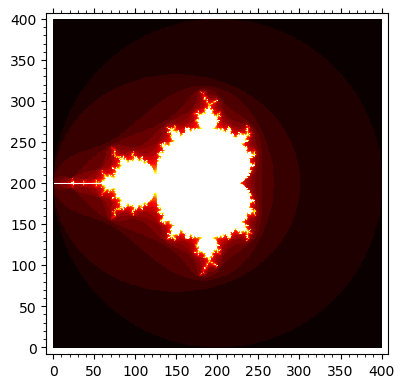

In [5]:
mandlebrot(30, -2,2, -2,2)

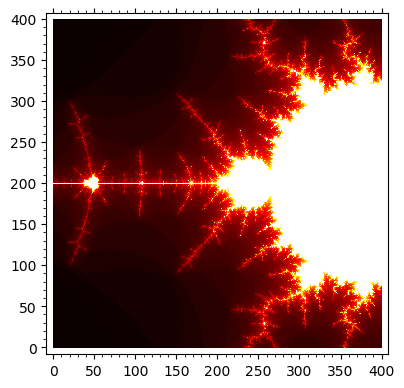

In [6]:
# Feigenbaum point c = -1.401155
# z^2 + c
p = -1.401155  # will zoom in centered here 
s = 0.1  # amount to zoom in 
mandlebrot(100, p-s,p+s, -s,s)

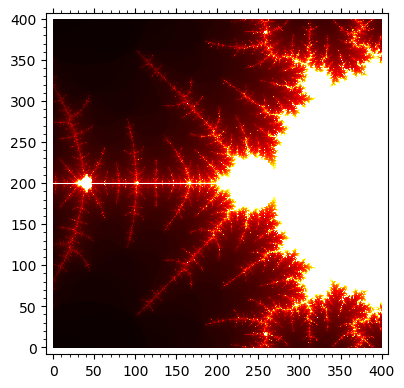

In [8]:
# Feigenbaum c = -1.401155
# z^2 + c
p = -1.401155
s = 0.02
mandlebrot(200, p-s,p+s, -s,s)
# this picture looks almost the same as above,
# even though it zoomed in 
# there are smaller and smaller bulbs 
# accumulating to the point p

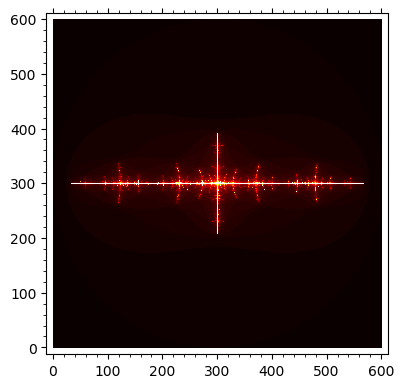

In [26]:
# Draw julia sets corresponding to pts in mandlebrot set
# Julia set for f_c(z) = z^2 + c, c=-1.401155
c=-1.401155

draw_julia_color(c, 100, -2, 2, -2, 2)
# Julia set is connected

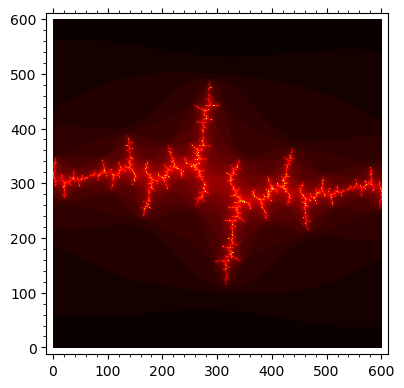

In [30]:
# trying a value  not in mandlebrot set
# close to feigenbaum (a bit above)
draw_julia_color(complex(c,0.1), 400, -1, 1, -1, 1)
# get disconnected Julia set

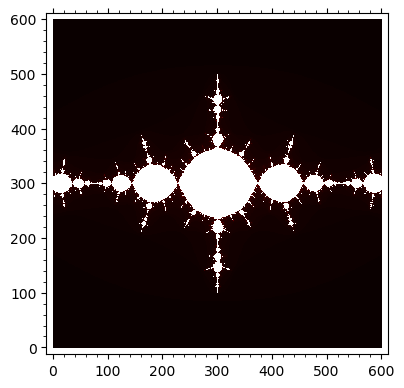

In [33]:
# trying a value in mandlebrot set
# close to feigenbaum
draw_julia_color(complex(c+0.1,0), 400, -1, 1, -1, 1)
# is connected

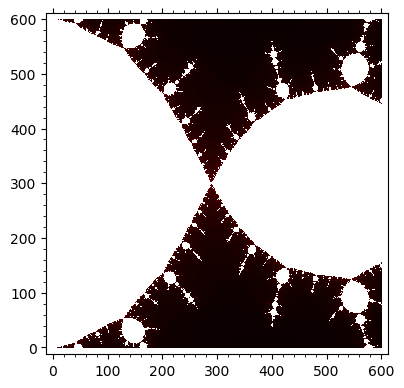

In [34]:
# zoom in on previous
draw_julia_color(complex(c+0.1,0), 400, 0.25-0.2, 0.25+0.2, -0.2, 0.2)


<h3> Fact: </h3>
Julia set $J(f_c)$ is connected if and only if $c$ is in Mandlebrot set.  